# Hacker News Stories

In this notebook...I used the latter option running the following query, that <span style="color:#f00">processed 955 GB</span> when run 2019-04-28. 

    SELECT * FROM `bigquery-public-data.hacker_news.full`
    WHERE score >= 50 AND type = "story" AND url != ""
    ORDER BY time DESC
    
In the code cell below, the Python libraries used in this notebook are imported, some variables set and the dataset loaded into a pandas DataFrame.

In [89]:
%matplotlib inline
%load_ext signature
import os
import re

import pandas as pd
import matplotlib.pyplot as plt
import tld

data_file = os.path.expanduser('~/data/hackernews/hackernews_popular_stories_2019-05-05.csv')
df = pd.read_csv(data_file, parse_dates=['timestamp'])
df.head()

The signature extension is already loaded. To reload it, use:
  %reload_ext signature


,by,score,time,timestamp,title,type,url,text,parent,deleted,dead,descendants,id,ranking
0,workrockin,73,1557035426,2019-05-05 05:50:26+00:00,Network Offloading in Openwrt [pdf],story,https://openwrtsummit.files.wordpress.com/2018...,NaN,NaN,NaN,NaN,1.0,19831385,NaN
1,clouddrover,75,1557019551,2019-05-05 01:25:51+00:00,US Ride-Share Drivers Ready for Countrywide St...,story,https://www.thedrive.com/news/27824/us-ride-sh...,NaN,NaN,NaN,NaN,59.0,19830505,NaN
2,p1esk,166,1557012444,2019-05-04 23:27:24+00:00,OpenAI releases larger GPT-2 model,story,https://openai.com/blog/better-language-models...,NaN,NaN,NaN,NaN,33.0,19830042,NaN
3,ColinWright,77,1557009447,2019-05-04 22:37:27+00:00,Goro Shimura has died,story,https://en.wikipedia.org/wiki/Goro_Shimura,NaN,NaN,NaN,NaN,10.0,19829828,NaN
4,ingve,50,1557008719,2019-05-04 22:25:19+00:00,Learning new skills in InfoSec without getting...,story,https://azeria-labs.com/paradox-of-choice/,NaN,NaN,NaN,NaN,3.0,19829775,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161614 entries, 0 to 161613
Data columns (total 14 columns):
by             161614 non-null object
score          161614 non-null int64
time           161614 non-null int64
timestamp      161614 non-null datetime64[ns, UTC]
title          161614 non-null object
type           161614 non-null object
url            161614 non-null object
text           975 non-null object
parent         0 non-null float64
deleted        0 non-null float64
dead           639 non-null object
descendants    161256 non-null float64
id             161614 non-null int64
ranking        0 non-null float64
dtypes: datetime64[ns, UTC](1), float64(4), int64(3), object(6)
memory usage: 17.3+ MB


In [90]:
# Fixes for 
# http:////www.economist.com/science-and-technology/2018/09/06/how-a-shampoo-bottle-is-saving-young-lives
# http://jdebp.eu./FGA/operating-system-books.html
def fix_url(url):
    return url.replace('jdebp.eu.', 'jdebp.eu').replace('http:////', 'http://')

df['url'] = df.url.apply(lambda s: fix_url(s))

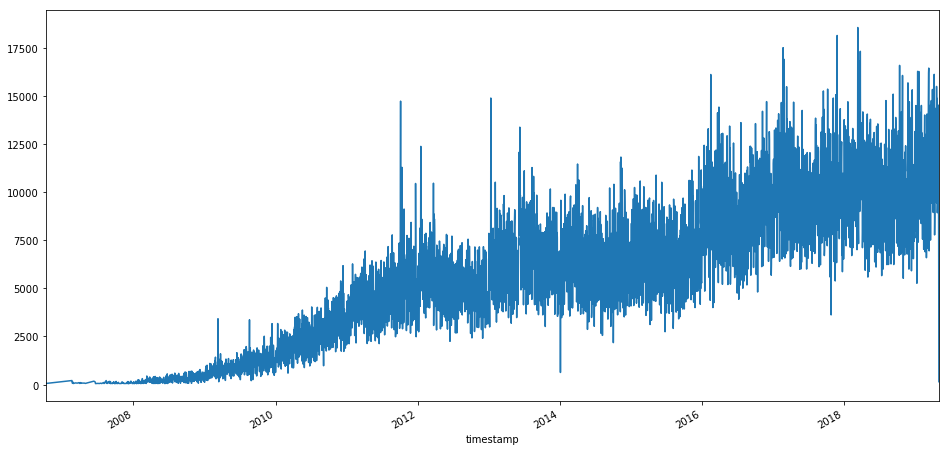

In [91]:
by_day = df.groupby(df.timestamp.dt.floor('D'))
by_day['score'].sum().plot(figsize=(16, 8))

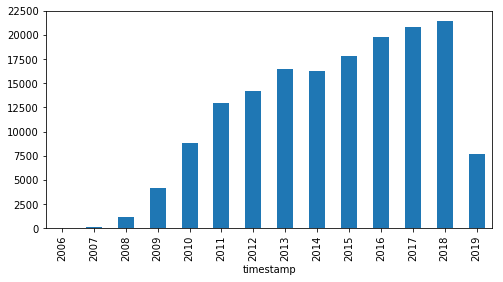

In [144]:
by_year = df.groupby(df.timestamp.dt.year)
by_year['score'].size().plot.bar(figsize=(8, 4))

In [140]:
df['domain'] = df.url.apply(lambda s: tld.get_fld(s, fail_silently=True))
top_domains = df.domain.value_counts().head(30)

by_domain = df.groupby(df.domain)

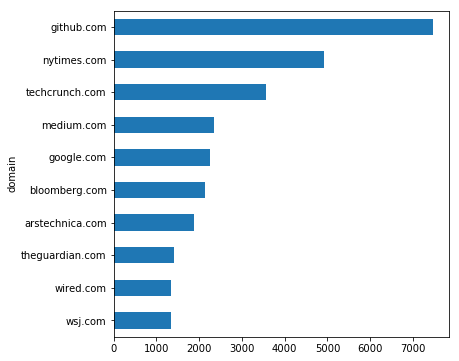

In [139]:
by_domain['score'].size().sort_values(ascending=False)[:10][::-1].plot.barh(figsize=(6, 6));

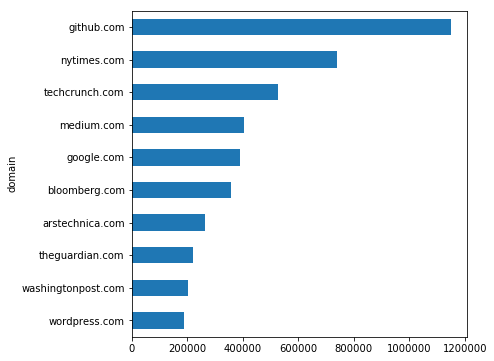

In [130]:
by_domain['score'].sum().sort_values(ascending=False)[:10][::-1].plot.barh(figsize=(6, 6));

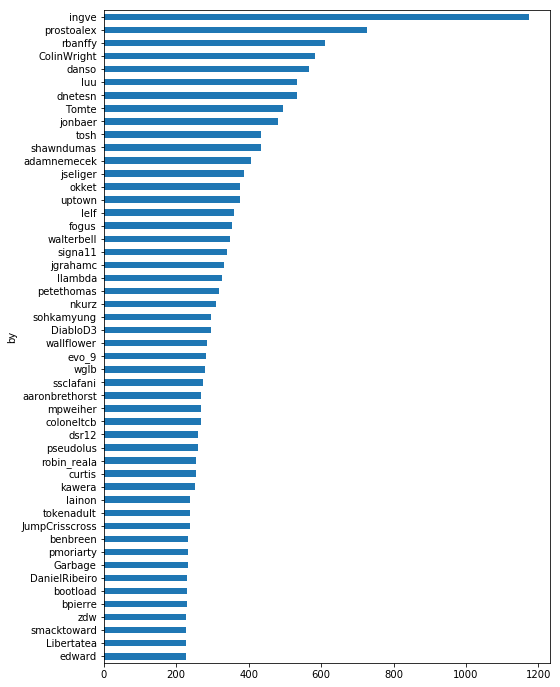

In [146]:
by_user = df.groupby(df.by)
by_user['score'].size().sort_values(ascending=False)[:50][::-1].plot.barh(figsize=(8, 12))